In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
df = sns.load_dataset('iris')

In [ ]:
df.shape

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

In [ ]:
# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())
print("Ultimas filas del dataset:")
print(df.tail())

In [ ]:
df['species'].value_counts()

In [ ]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(df.describe())

¿Cómo están relacionados el sépalo y el pétalo?

¿Cómo se relaciones las dimensiones ambos en diferentes especies?


Generando Pair Plot para visualizar relaciones entre variables:


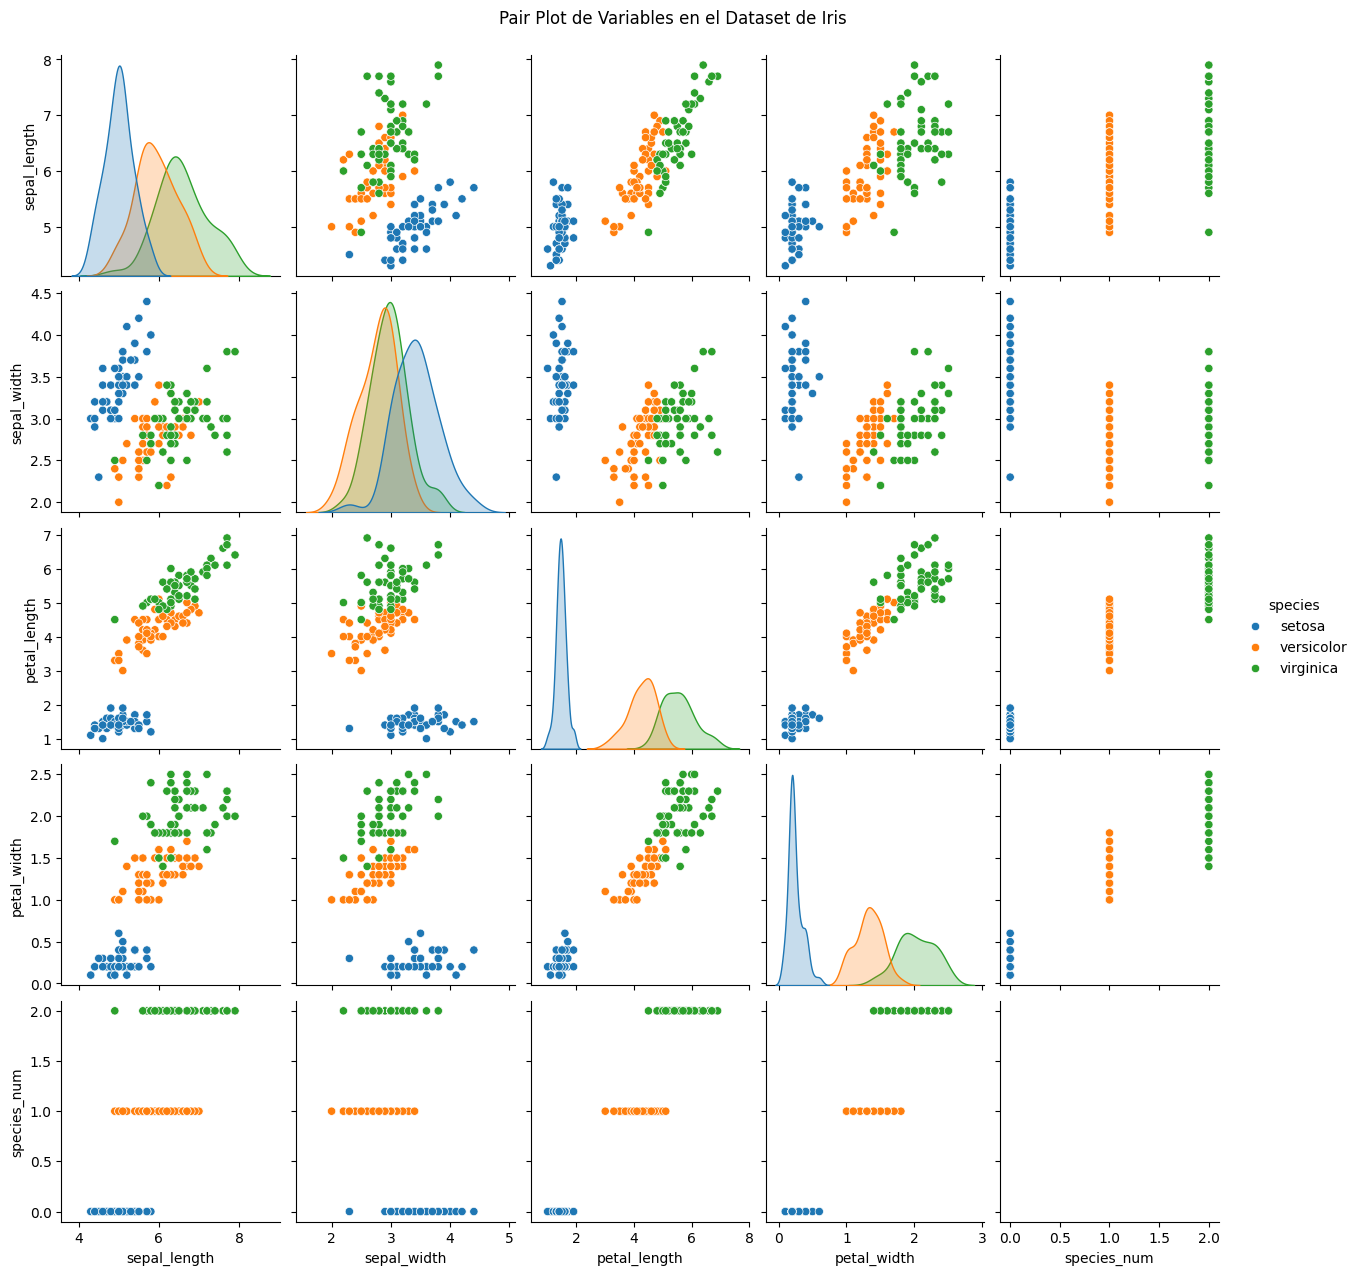

In [ ]:
# Pair Plot para visualizar relaciones entre todas las variables
print("\nGenerando Pair Plot para visualizar relaciones entre variables:")
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot de Variables en el Dataset de Iris', y=1.02)
plt.show()


Insights sobre:
1. Las densidades
a. Siempre hay un orden claro (excepto en el ancho del sépalo).
b. Los pétalos de las setosa son mas chicos, y los de la virginica más grande.
2. Las correlaciones
a. Entre largo y ancho de sépalo hay una correlación positiva.
b. Entre largo de sépalo y largo de pétalo hay una correlación positiva solo para virginica y versicolor.
c. Entre el ancho del pétalo y el ancho del sépalo también algo parecido.
d. Entre largo y ancho del pétalo hay una correlación positiva

In [ ]:
import numpy as np

In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación para todas las observaciones:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


El objetivo es analizar correlaciones.
1. El ancho del sepalo y el largo del sepalo no estan correlacionados. CUIDADO CON LAS CORRELACIONES. HAY QUE SIEMPRE MIRAR SI NO HAY QUE HACERLAS A NIVEL DE CADA GRUPO.

In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df[df['species']=='setosa'].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación para Setosas')
plt.show()


In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df[df['species']=='versicolor'].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación para Versicolor')
plt.show()


In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df[df['species']=='virginica'].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación para las Virginica')
plt.show()


In [ ]:
# Facet Grid para analizar la distribución de una variable en diferentes subgrupos
print("\nGenerando Facet Grid para visualizar distribución por especie:")
g = sns.FacetGrid(df, col="species")
g.map(plt.hist, "sepal_length")
plt.suptitle('Facet Grid de Longitud de Sépalo por Especie', y=1.02)
plt.show()



Generando Gráfico de Coordenadas Paralelas:


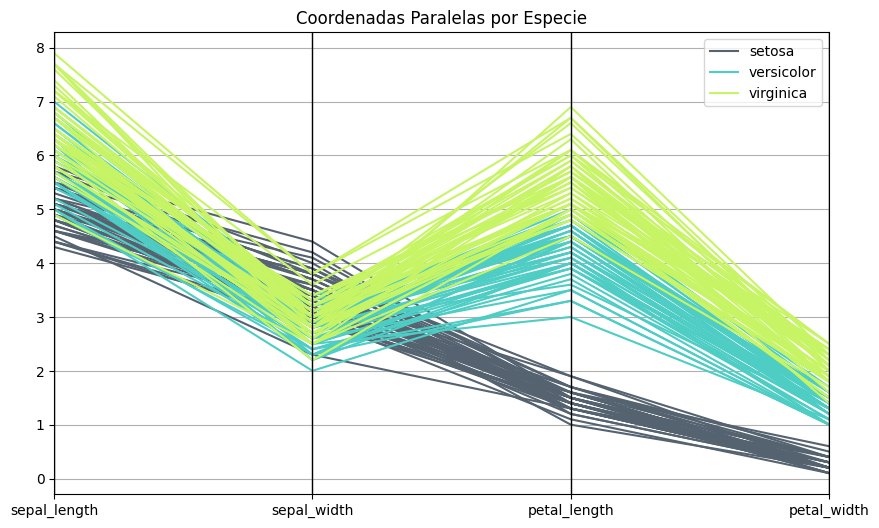

In [ ]:
# Gráfico de Coordenadas Paralelas para visualizar relaciones multivariadas
from pandas.plotting import parallel_coordinates

# Convertir la columna categórica 'species' a numérica
df['species_num'] = pd.Categorical(df['species']).codes

print("\nGenerando Gráfico de Coordenadas Paralelas:")
plt.figure(figsize=(10, 6))
parallel_coordinates(df, class_column='species', cols=df.columns[:-2], color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Coordenadas Paralelas por Especie')
plt.show()


1. Las tres especies difieren entre si.
2. En los sepalos la versicolor y la virginica se superponen un poco mas, pero en los petalos no.
3. Las especies a la interna, son bastante parecidas entre ellas.
4. En las setosas, largo del petalo es mas chico que largo y ancho del sepalo. En los otras no pasa.

Este grafico:
1. Nos permite ver patrones mas alla de la correlacion. Por ejemplo nos permite si todos los valores de una dimension son mas chicos que los de otra dimension, pero dentro la misma fila.
2. Nos permitiria ver si hay outliers.
3. Los patrones especies (si las especies difieren mucho).|


Generando Heatmap de Densidad:


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


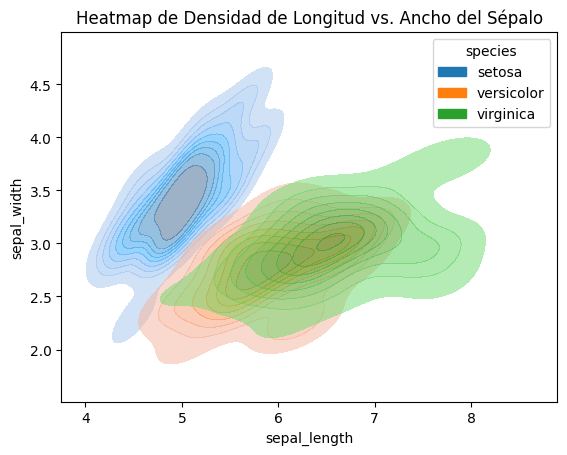

In [ ]:
# Heatmap de Densidad para identificar áreas de alta concentración
print("\nGenerando Heatmap de Densidad:")
sns.kdeplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], alpha=0.5, cmap="Blues", fill=True)
plt.title('Heatmap de Densidad de Longitud vs. Ancho del Sépalo')

plt.show()




Generando Heatmap de Densidad:


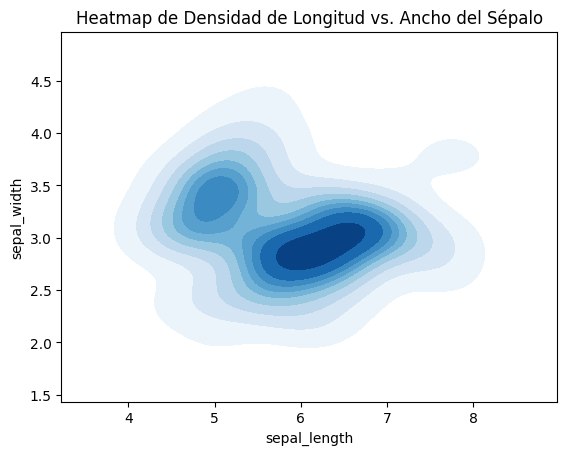

In [ ]:
# Heatmap de Densidad para identificar áreas de alta concentración
print("\nGenerando Heatmap de Densidad:")
sns.kdeplot(x=df['sepal_length'], y=df['sepal_width'], cmap="Blues", fill=True)
plt.title('Heatmap de Densidad de Longitud vs. Ancho del Sépalo')

plt.show()



1. Saber la distribución de dos variables -> Donde esta concentrada la mayor cantidad de observaciones: Alrededor de el largo ~6, ancho~3, hay un nucleo importante de observaciones. Pero tambien lo hay alrededor de ~3.4 de ancho y ~5 de largo. Esto tiene dos "picos".
2. Nos podria servir para ver si hay patrones (monotonicidad, linealidad, etc.).


Generando Contour Plot:


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


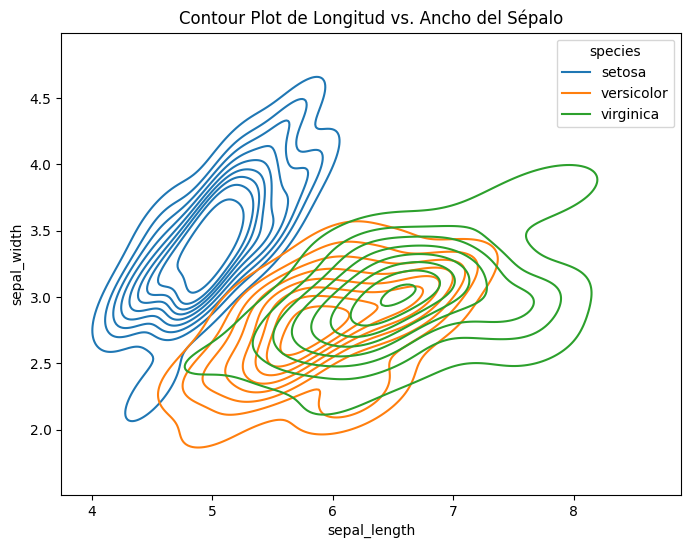

In [ ]:
# Contour Plot para analizar la distribución conjunta de dos variables
print("\nGenerando Contour Plot:")
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], levels=10, cmap='coolwarm')
plt.title('Contour Plot de Longitud vs. Ancho del Sépalo')

plt.show()


Podemos variar el numero de niveles. Esto sirve para identificar zonas con la mismas densidad.


Generando Violin Plot para detectar desigualdades:


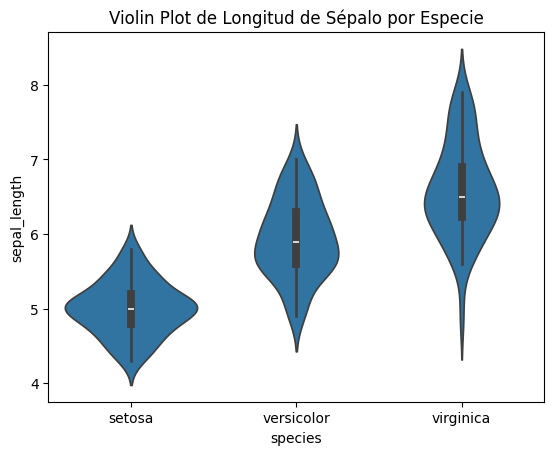

In [ ]:
# Violin Plot para visualizar la distribución y posibles desigualdades
print("\nGenerando Violin Plot para detectar desigualdades:")
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Violin Plot de Longitud de Sépalo por Especie')
plt.show()

La distribución es solo simétrica para las setosa